## Problem Statment 
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
 
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 
 
Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

    

## Steps to be performed 
##### 1. Importing all the required libraries 
##### 2. Reading and understanding the Dataset 
##### 3. Data preprocessng & EDA
##### 4. Model building & Feature selection (Using RFE )
##### 5. Model Evaluation 

#### 1.Importing all the required libraries

In [1]:
# importing Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

In [2]:
# to suppress warning importing libraries 
import warnings
warnings.filterwarnings('ignore')

#### 2. Reading and undertanding the Dataset

In [3]:
leaddata = pd.read_csv("Leads.csv")

In [4]:
leaddata.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
leaddata.shape

(9240, 37)

In [6]:
#understanding the dataset wrt to datatypes
leaddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# getting statistical details of the continous variables
leaddata.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### 2. Data preprocessng & EDA

In [8]:
# understanding and Gauging he Null in he dataset in terms of number 
leaddata.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
# understanding and Gauging he Null in he dataset in terms of percentage  
leaddata.isnull().sum() /  leaddata.shape[0]

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.266342
Specialization                                   0.155628
How did you hear about X Education               0.238853
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Magazine      

In [10]:
# considering 30% is the threshold of accepatble null values in a column 
#if the null values in a column exceeds approx 30% then the column may not be useful for Analysis and 
# henceforth we are going to drop those columns from Analysis 
# we are considering actual number rather than % because we have around 9K records
colswith2800nulls= (leaddata.columns[leaddata.isnull().sum() >= 2800]).tolist()
print('Number of Columns which is eligible t be dropped as per Assumption :',len(colswith2800nulls))
print('columns to be dropped ',colswith2800nulls)

Number of Columns which is eligible t be dropped as per Assumption : 6
columns to be dropped  ['Tags', 'Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [11]:
# dropping columms 
leaddatamod = leaddata.drop(colswith2800nulls,axis=1)

In [12]:
leaddatamod.shape

(9240, 31)

In [13]:
leaddatamod.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,Select,Mumbai,No,No,Modified


In [14]:
# list of column which has some null values present 
leaddatamod.columns[leaddatamod.isnull().sum() > 0].to_list()

['Lead Source',
 'TotalVisits',
 'Page Views Per Visit',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Lead Profile',
 'City']

In [15]:
leaddatamod[leaddatamod.columns[leaddatamod.isnull().sum() > 0]]

,Lead Source,TotalVisits,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Lead Profile,City
0,Olark Chat,0.0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,Select,Select
1,Organic Search,5.0,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,Select,Select
2,Direct Traffic,2.0,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,Potential Lead,Mumbai
3,Direct Traffic,1.0,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,Select,Mumbai
4,Google,2.0,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,Select,Mumbai
...,...,...,...,...,...,...,...,...,...,...,...
9235,Direct Traffic,8.0,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,Potential Lead,Mumbai
9236,Direct Traffic,2.0,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,Potential Lead,Mumbai
9237,Direct Traffic,2.0,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,Potential Lead,Mumbai
9238,Google,3.0,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,NaN,Other Metro Cities


In [16]:
# list of columns whose datatyep is Object ( categorical)
leaddatamod.select_dtypes(include='object').columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [17]:
# finding specific unique Values 
leaddatamod.City.value_counts()

City
Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [18]:
# getting unique values of all the categorical columns and can be analysed 
for cols in leaddatamod.select_dtypes(include='object').columns:
    if cols != 'Prospect ID':
        print('All values of columm : ',cols)
        print(leaddatamod[cols].value_counts())   

All values of columm :  Lead Origin
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
All values of columm :  Lead Source
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64
All values of columm :  Do Not Email
Do Not Email
No     8506
Yes     734
Name: count, dtype: int64
All values of columm :  Do Not Call
Do Not Cal

In [19]:
# listing and analysing on columns who has null values , count of Null and distinct values it has 
for nullcols in leaddatamod.columns[leaddatamod.isnull().sum() > 0].to_list():
    print(f'Column : {nullcols} has { leaddatamod[nullcols].isnull().sum() } null values')
    print('below are distinct values :')
    print(leaddatamod[nullcols].value_counts())

Column : Lead Source has 36 null values
below are distinct values :
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64
Column : TotalVisits has 137 null values
below are distinct values :
TotalVisits
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
2

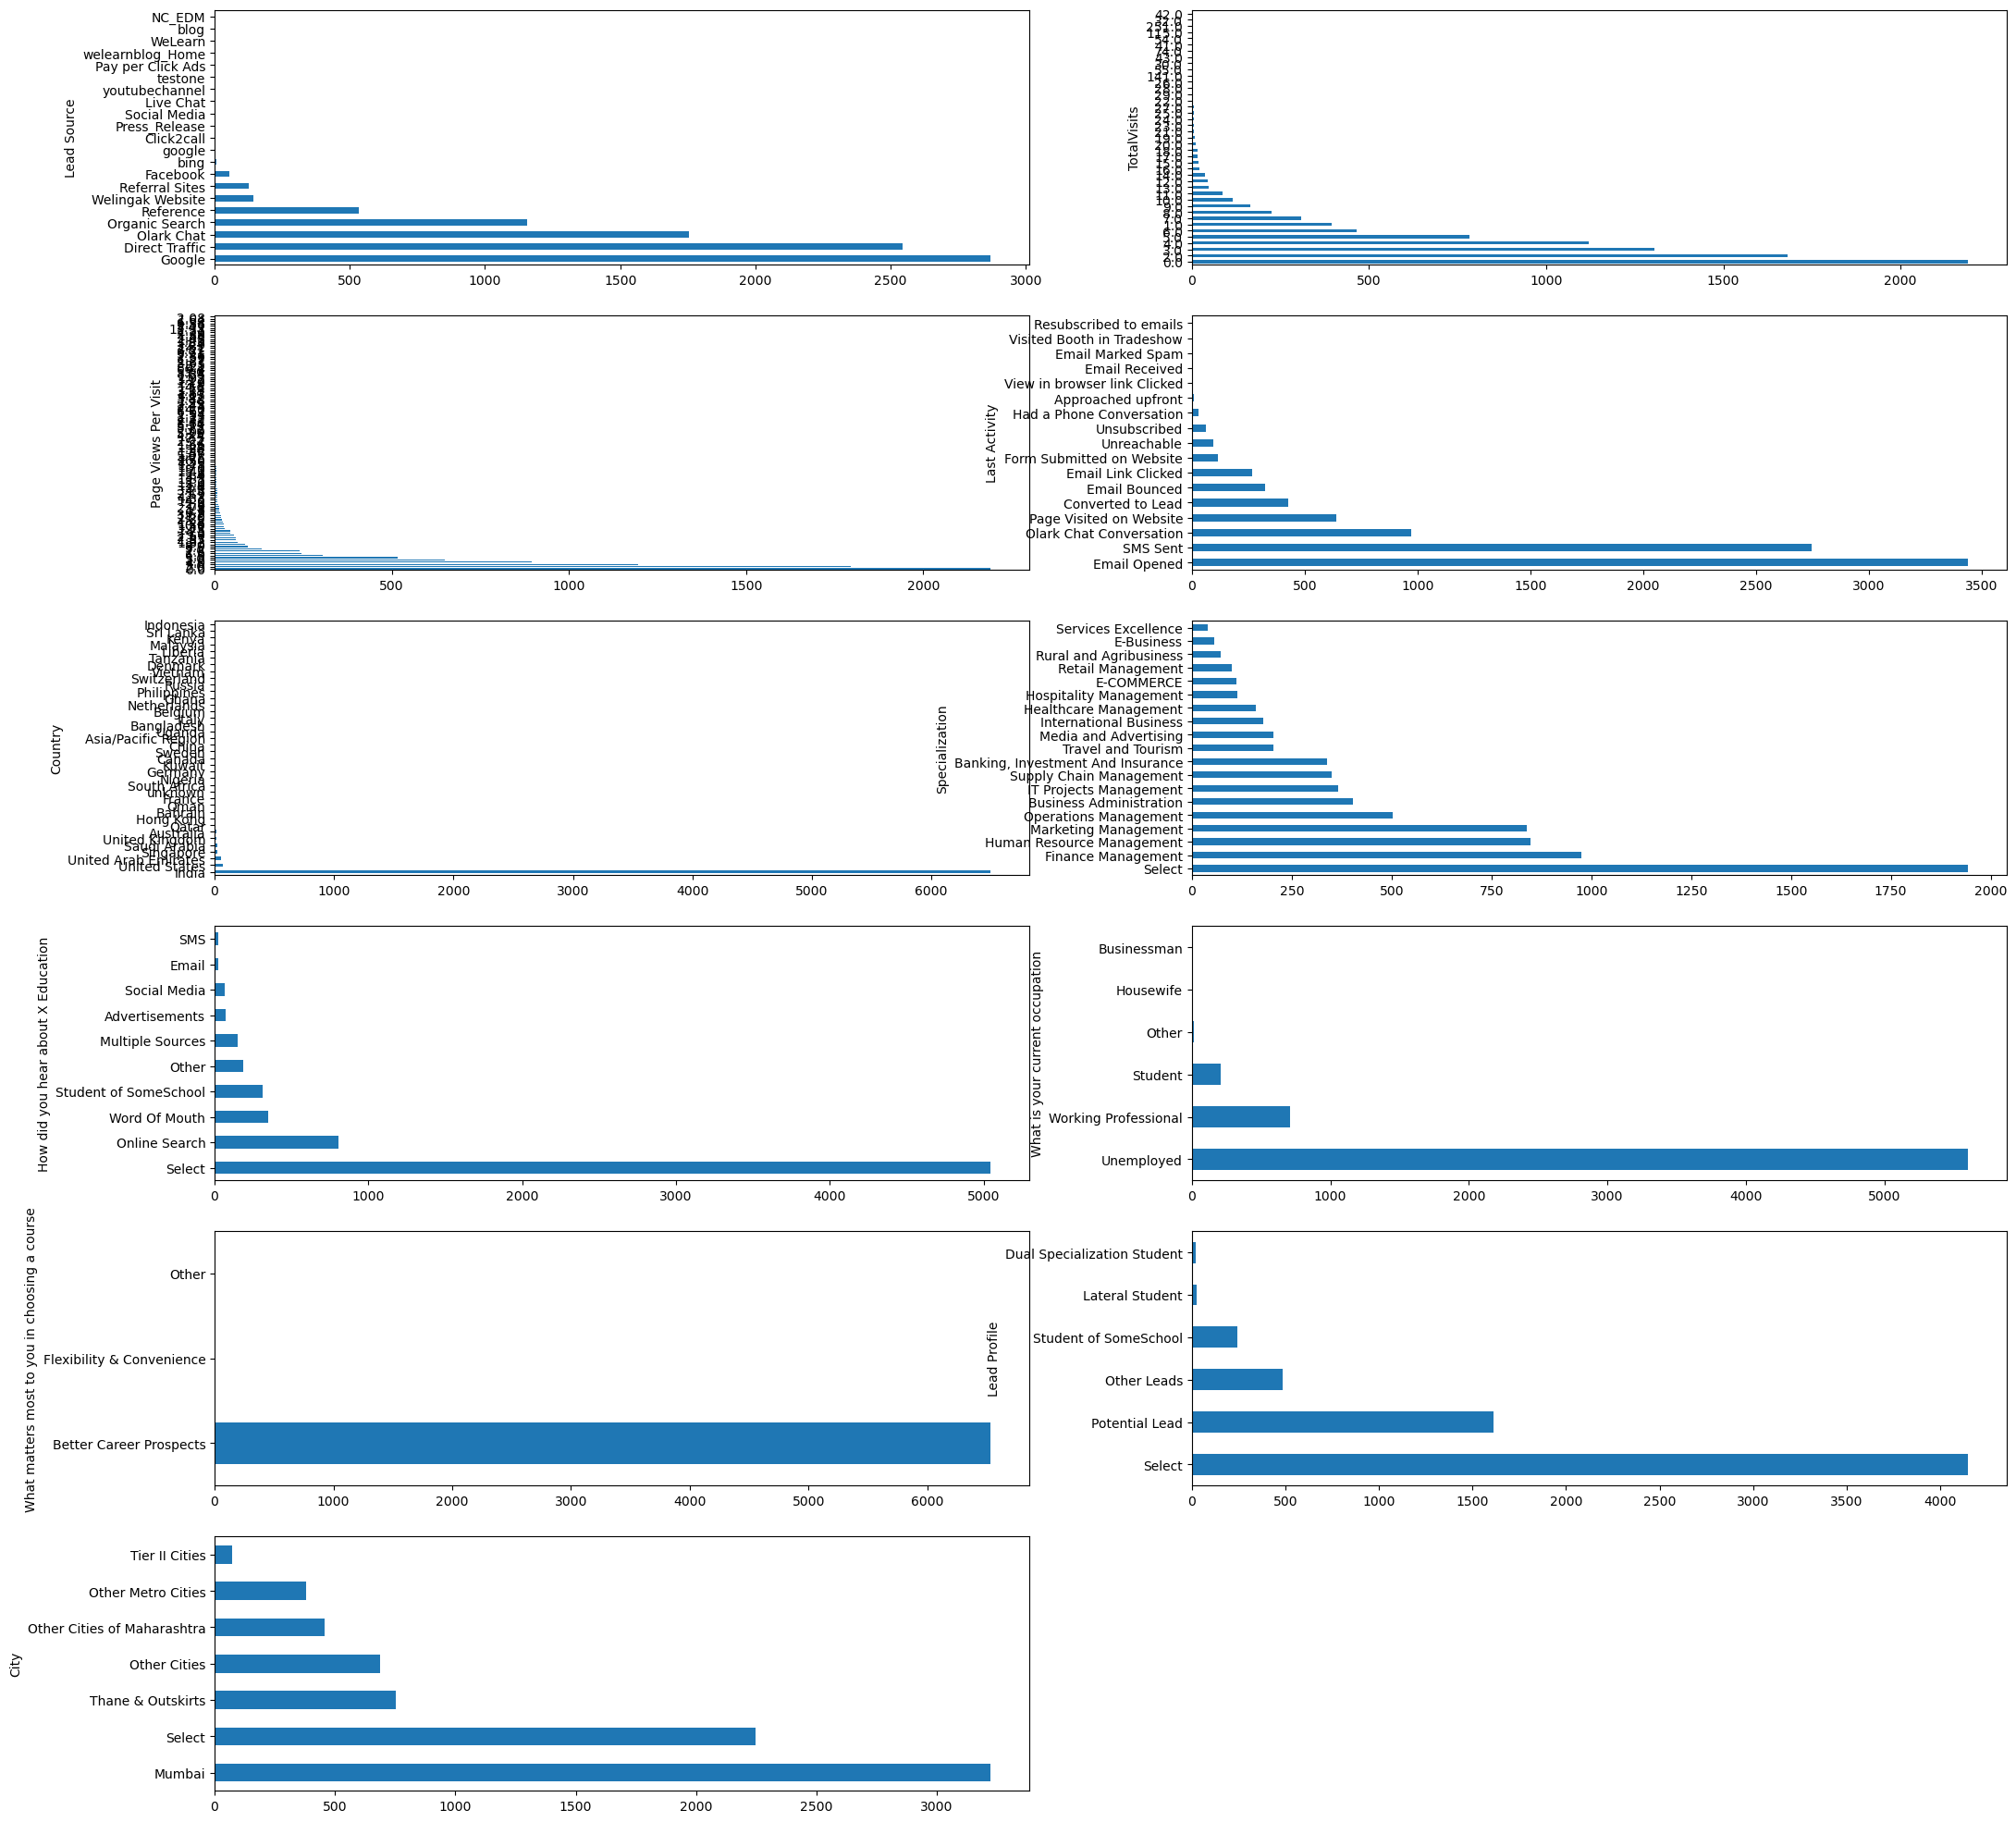

In [20]:
#Ploting the bar chart to get to know what is the count of values prsent in columns with Null values 
plt.figure(figsize=(25,25))
cnt = 1
for nullcols in leaddatamod.columns[leaddatamod.isnull().sum() > 0].to_list():
    plt.subplot(6,2,cnt)
    leaddatamod[nullcols].value_counts().plot(kind='barh')
    cnt = cnt + 1
plt.show()

#### Null value handling with rationale 
1.  Analysis of each column having null vakues and their plan of handling
2.  Lead Source >> Important attribute and if the Source is not known we can drop that records 
3.  TotalVisits >> Important attribute to score lead and the value is null then we can drop that records  
4.  Page Views Per Visit >> Important attribute to score lead and the value is null then we can drop that records 
5.  Last Activity >> Activity last done with the education organization, Important attribute to score lead and the value is null then we can drop that records 
6.  Country >> Since the company sells courses online; country has around 2.5K nulls and 6K just india henceforth this attribute may not add value and we can drop 
7.  Specialization >> total columns 9K , Null > 1438 and value select = 1942 i.e allmost 3.5K recs have no value henceforth we can drop 
8.  How did you hear about X Education >> total columns 9K , Null > 2204 and value select = 5043 i.e allmost 7K records have no value henceforth we can drop this 
9.  What is your current occupation >> Occupation could be factor to choose courses , around 2690 is NULL, we will impute with Mode 
10.  What matters most to you in choosing >> total columns 9K , Null > 2709 and Value Better Career Prospects = 6528 and no other prominents values , seems will not impact decesion and we can drop 
11.  Lead Profile >> total columns 9K , Null > 2709 and value select = 4146 i.e allmost 7K records have no value henceforth we can drop this 
12.  City >> total columns 9K , Null > 1420 and value select = 2249 i.e allmost 4K recs have no value henceforth we can drop 


In [21]:
# droping columns ( Country ,Specialization , How did you hear about X Education , What matters most to you in choosing,
# Lead Profile, City  )
dropcols = ['Country','Specialization', 'How did you hear about X Education','What matters most to you in choosing a course'
           , 'Lead Profile', 'City']
leaddatamod = leaddatamod.drop(dropcols,axis=1)

In [22]:
# Droping rows ( Lead Source , TotalVisits , Page Views Per Visit, Last Activity, )
leaddatamod = leaddatamod[~pd.isnull(leaddatamod['Lead Source'])]
leaddatamod = leaddatamod[~pd.isnull(leaddatamod['TotalVisits'])]
leaddatamod = leaddatamod[~pd.isnull(leaddatamod['Page Views Per Visit'])]
leaddatamod = leaddatamod[~pd.isnull(leaddatamod['Last Activity'])]

In [23]:
# imputing values 
# mode imputation (What is your current occupation , )
leaddatamod['What is your current occupation'] = leaddatamod['What is your current occupation'].replace(np.nan,leaddatamod['What is your current occupation'].mode().values[0])

In [24]:
leaddatamod.shape

(9074, 25)

In [25]:
leaddatamod[pd.isnull(leaddatamod['Lead Source']) | pd.isnull(leaddatamod['Page Views Per Visit']) | pd.isnull(leaddatamod['TotalVisits']) | pd.isnull(leaddatamod['Last Activity'])].shape

(0, 25)

In [26]:
leaddatamod[pd.isnull(leaddatamod['Lead Source'])].shape

(0, 25)

In [27]:
leaddatamod[pd.isnull(leaddatamod['TotalVisits'])].shape

(0, 25)

In [28]:
leaddatamod[pd.isnull(leaddatamod['Page Views Per Visit'])].shape

(0, 25)

In [29]:
leaddatamod[pd.isnull(leaddatamod['Last Activity'])].shape

(0, 25)

In [30]:
leaddatamod.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content           0
Get updates on DM Content         

In [31]:
leaddatamod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9074 non-null   object 
 1   Lead Number                               9074 non-null   int64  
 2   Lead Origin                               9074 non-null   object 
 3   Lead Source                               9074 non-null   object 
 4   Do Not Email                              9074 non-null   object 
 5   Do Not Call                               9074 non-null   object 
 6   Converted                                 9074 non-null   int64  
 7   TotalVisits                               9074 non-null   float64
 8   Total Time Spent on Website               9074 non-null   int64  
 9   Page Views Per Visit                      9074 non-null   float64
 10  Last Activity                            

In [32]:
leaddatamod.select_dtypes(include='int64').columns

Index(['Lead Number', 'Converted', 'Total Time Spent on Website'], dtype='object')

In [33]:
leaddatamod.select_dtypes(include='float64').columns

Index(['TotalVisits', 'Page Views Per Visit'], dtype='object')

<Figure size 2500x800 with 0 Axes>

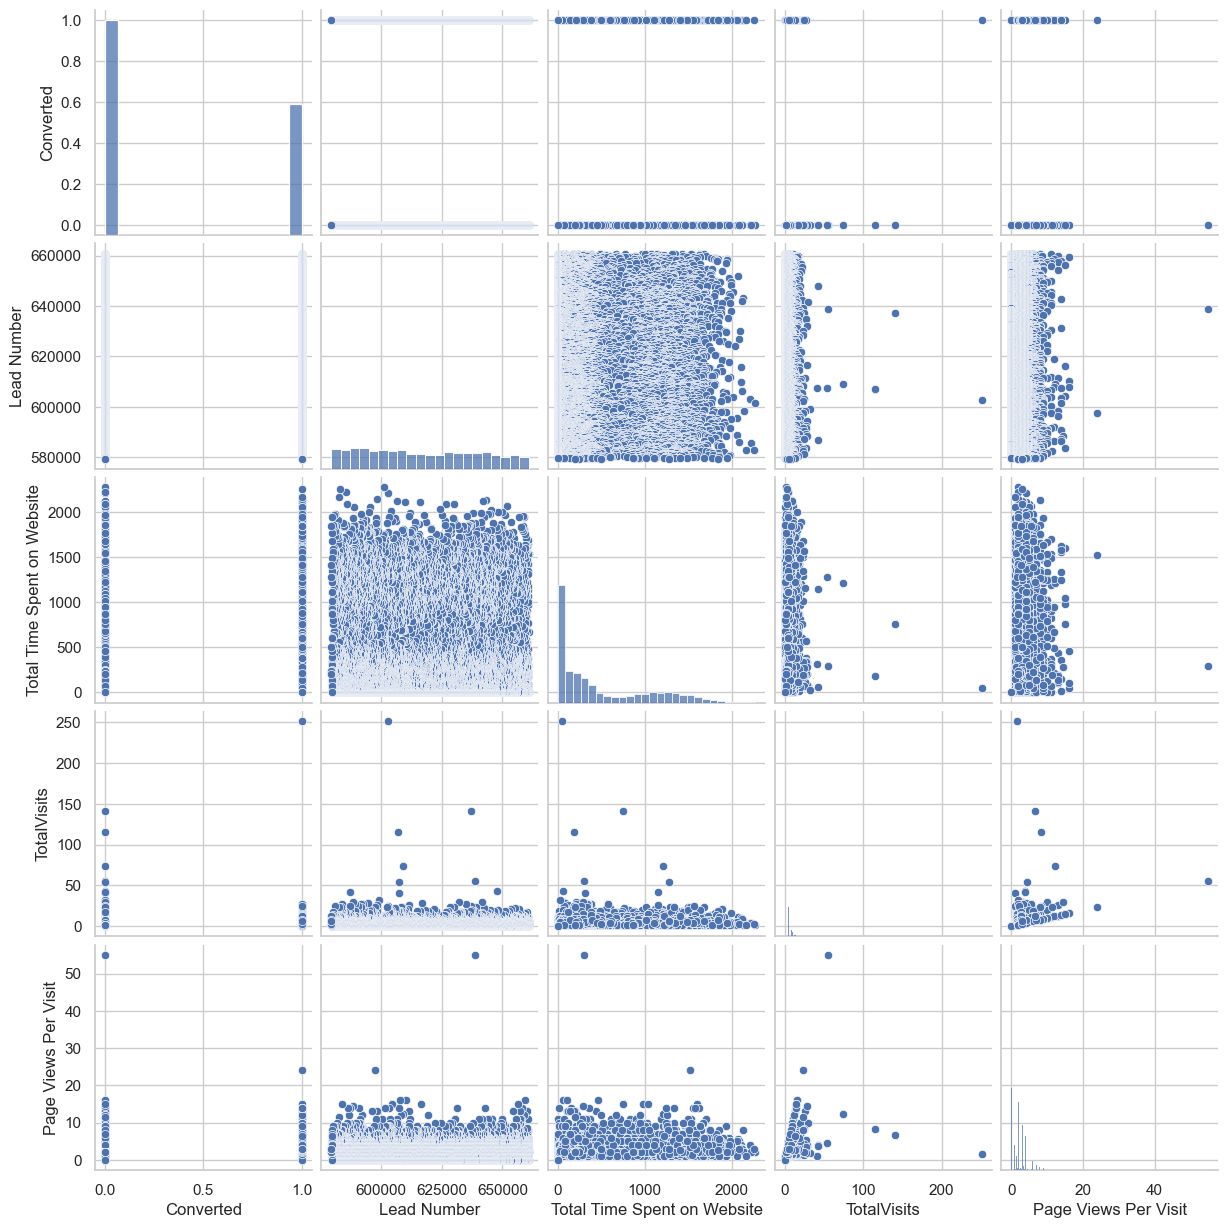

In [34]:
# ploting pair plot to see if any linear relationship between variables 
plt.figure(figsize=(25,8))
sns.set(style='whitegrid')
sns.set_color_codes(palette='dark')
sns.pairplot(data=leaddatamod,vars=['Converted', 'Lead Number', 'Total Time Spent on Website', 'TotalVisits', 'Page Views Per Visit'],markers=["o", "s", "D"])
plt.show()

#### Analysis
1. No Linearity in the continous variables 

In [35]:
# list of variables whose correlation needs analysis 
col4correlation = ['Converted', 'Lead Number','Total Time Spent on Website', 'TotalVisits', 'Page Views Per Visit']

In [36]:
# Creating dataframe for numerical columns for plotting the correltion  
corr_df = leaddatamod[col4correlation]

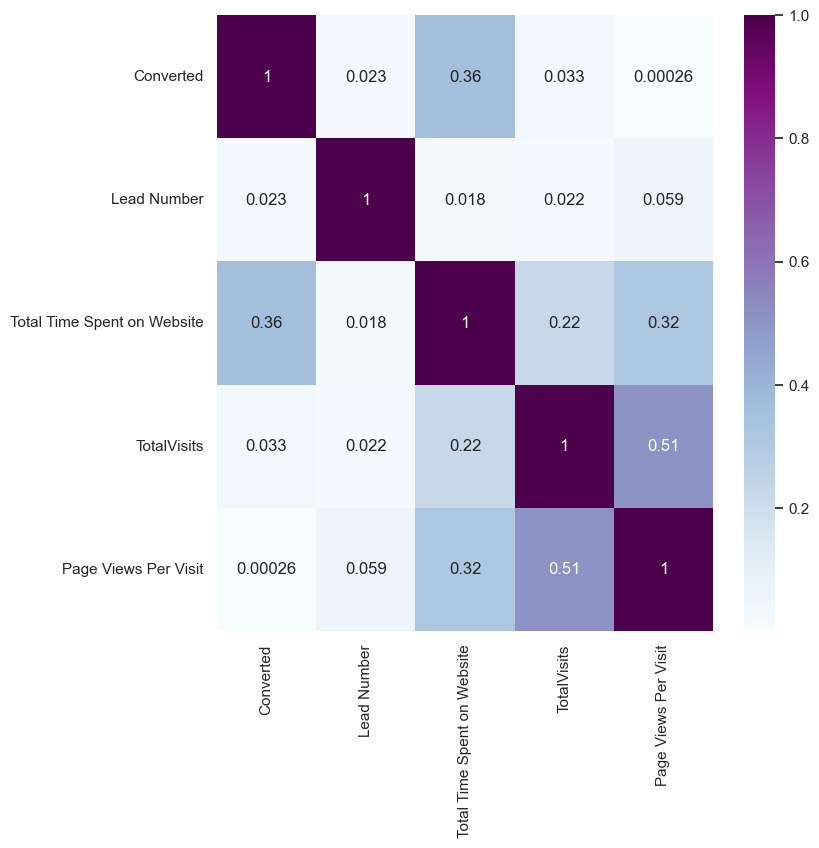

In [37]:
# ploting the correlation 
plt.figure(figsize=(8,8))
sns.set(style='whitegrid')
sns.heatmap(corr_df.corr(),cmap="BuPu",annot=True)
plt.show()

#### Analysis 
1. not much corelation between variables 

In [38]:
leaddatamod.Newspaper.value_counts()

Newspaper
No     9073
Yes       1
Name: count, dtype: int64

In [39]:
leaddatamod.select_dtypes(include='object').columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'What is your current occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [40]:
# looking at the values of all categorical columns and see how many distinct values are there 
# and then take some cal on its use in Analysis 
for cols in leaddatamod.select_dtypes(include='object').columns:
    if cols != 'Prospect ID':
        print('All values of columm : ',cols)
        print(leaddatamod[cols].value_counts()) 

All values of columm :  Lead Origin
Lead Origin
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: count, dtype: int64
All values of columm :  Lead Source
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64
All values of columm :  Do Not Email
Do Not Email
No     8358
Yes     716
Name: count, dtype: int64
All values of columm :  Do Not Call
Do Not Call
No     9072
Yes       2
Name: 

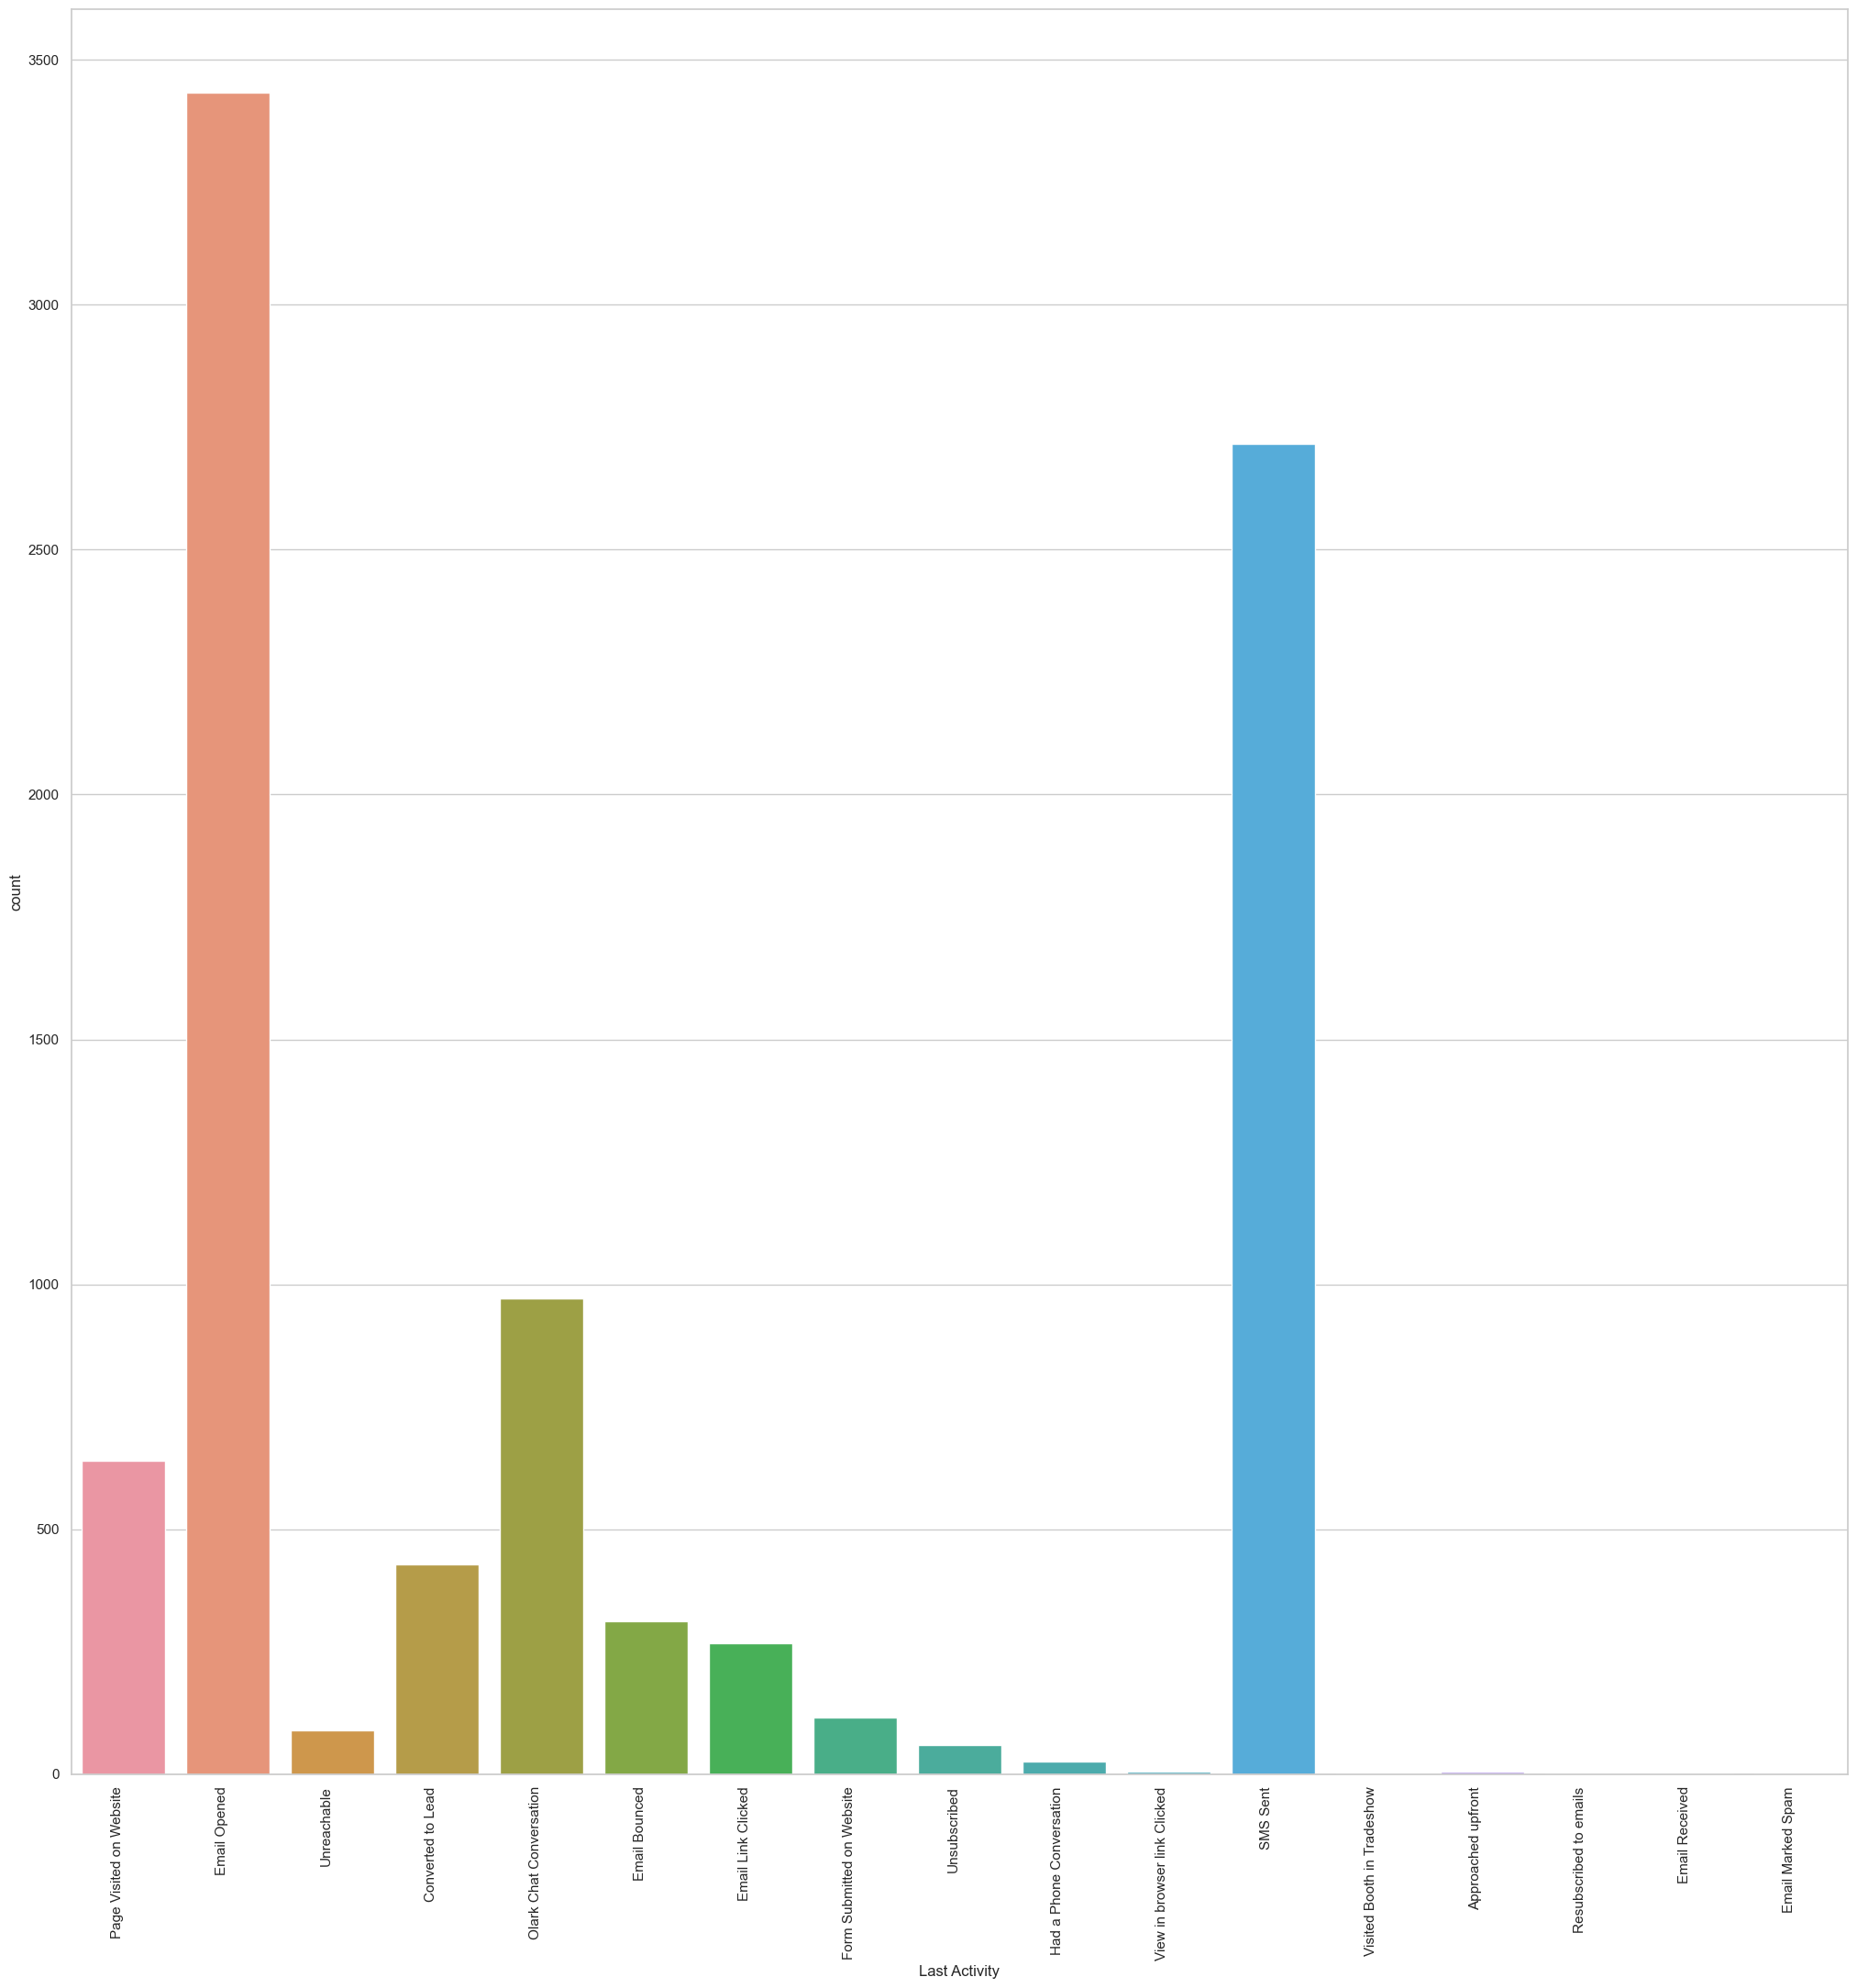

In [41]:
plt.figure(figsize=(25, 25))
ax = sns.countplot(x = 'Last Activity',data=leaddatamod)
ttangle = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, horizontalalignment='right')
plt.show()

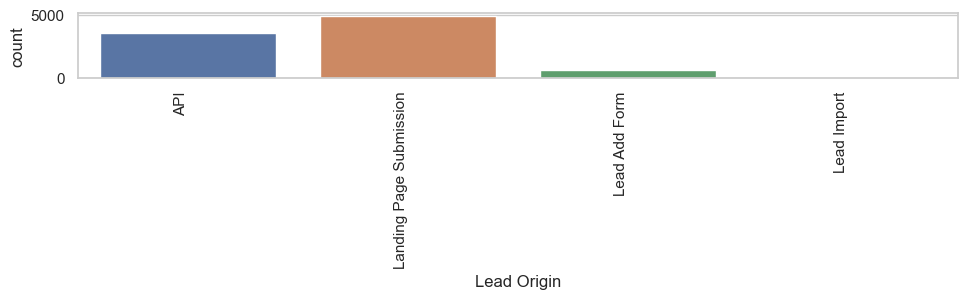

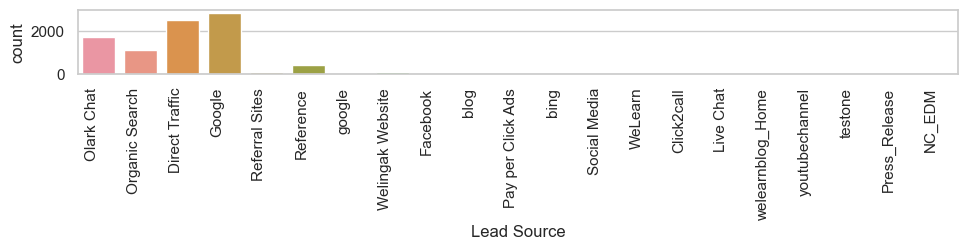

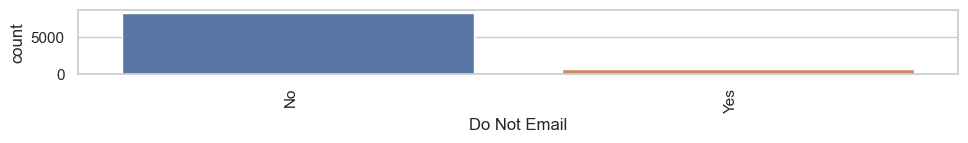

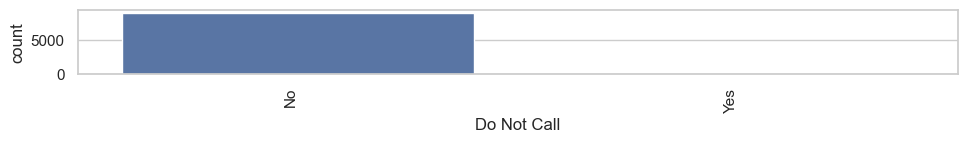

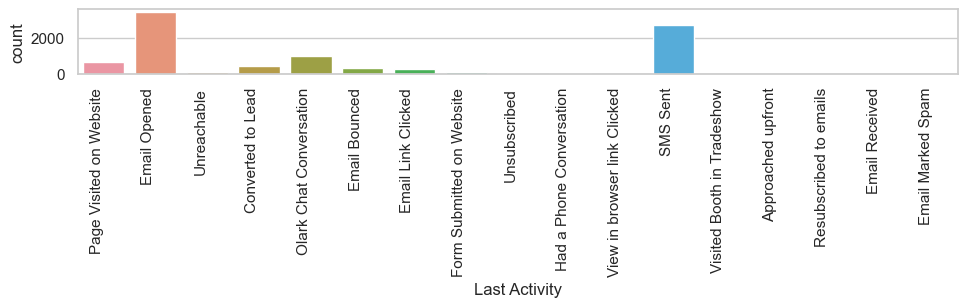

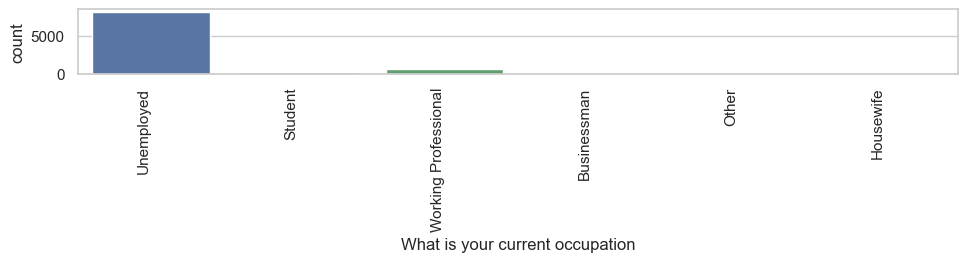

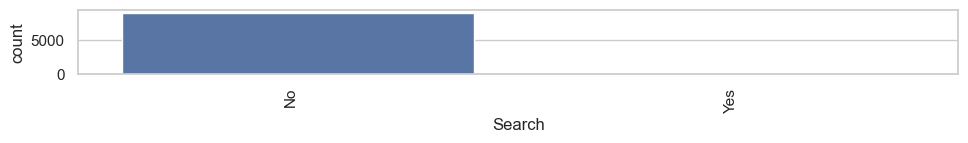

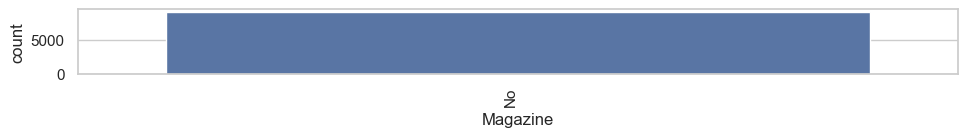

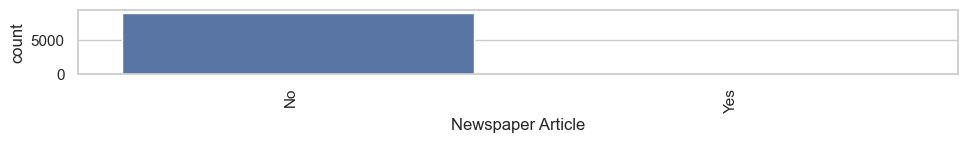

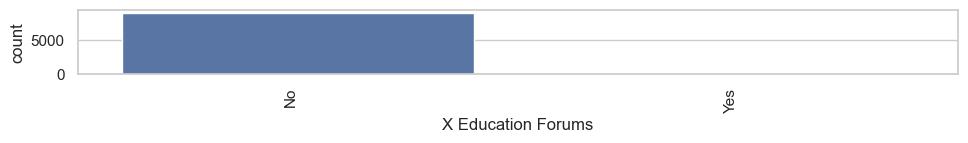

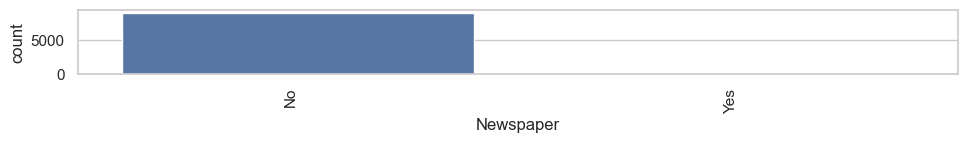

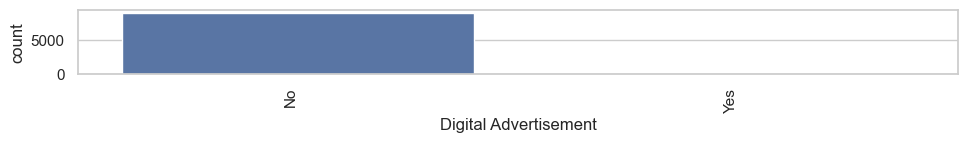

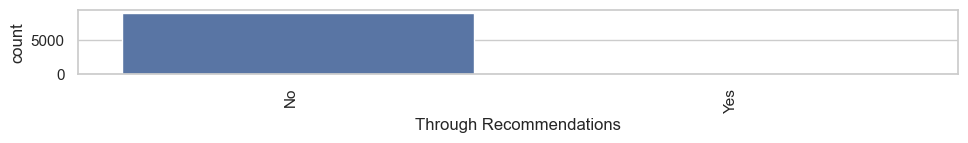

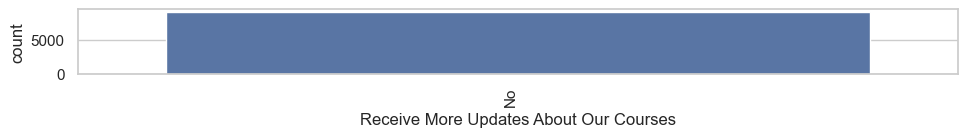

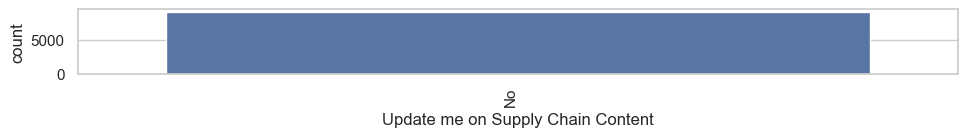

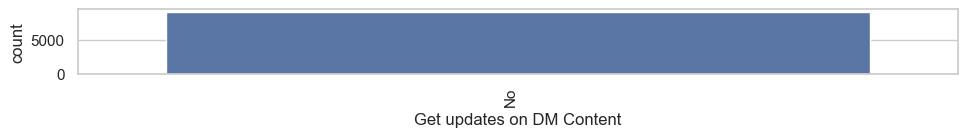

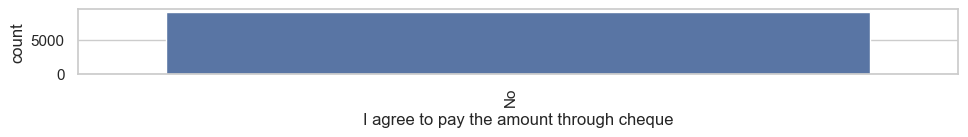

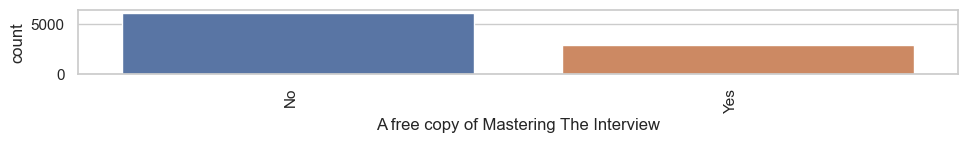

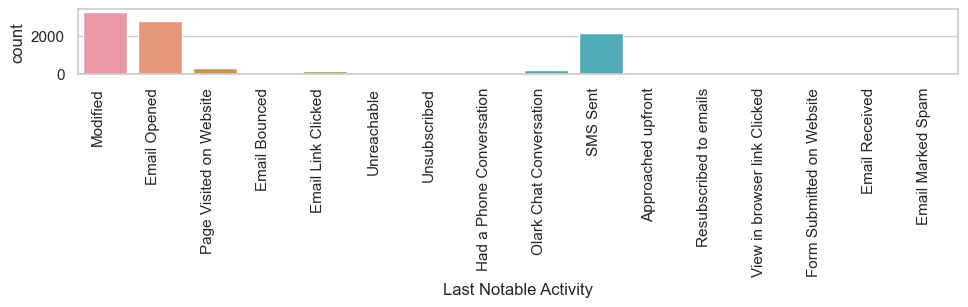

In [42]:
# plotting each catehorical column which the distnct values it has and decision can be taken on 
# what has to be done with such columns 
catcols = leaddatamod.select_dtypes(include='object').columns
sns.set(style='whitegrid')
cnt = 1
for cols in catcols:
    if cols != 'Prospect ID':
        plt.figure(figsize=(25,25))
        plt.subplot(25,2,cnt)
        ax = sns.countplot(x = cols ,data=leaddatamod)
        #plt.title(cols)
        ax.set(xlabel=cols)
        ttangle = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, horizontalalignment='right')
        cnt = cnt + 1
        plt.show()

#### Analysis based on above visuals and values printed below has to be done 
1. we can drop the below columns as only one value exists and that will not have any impact on analysis or Decesion making 
2. Do Not Call (no = 9072 , yes = 2)
3. Search ( no = 9060 , yes = 14 )
4. Magazine (no=9074)
5. Newspaper Article ( no = 9072 , yes = 2)
6. X Education Forums (no = 9073 , yes = 1)
7. Newspaper ( no = 9073 , yes = 1)
8. Digital Advertisement (no = 9070 , yes = 4 )
9. Through Recommendations (no = 9067 , yes = 7)
10. Receive More Updates About Our Courses (no=9070)
11. Update me on Supply Chain Content (no = 9074)
12. Get updates on DM Content (no=9074)
13. I agree to pay the amount through cheque (no=9074)


In [43]:
# columns which can dropped because of above reason
col2notsignificant = ['Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                      'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                     'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']

In [44]:
col2notsignificant

['Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [45]:
leaddatamod = leaddatamod.drop(col2notsignificant,axis=1)

####  Analysis on columns which can be discarded 

In [46]:
# Attributes / columns which are sort of Unique ID and number of the leads captured which 
# will not add value to Analysis / Decesion making henceforth we can take that off 
# details from Data Dictionary : Prospect ID	A unique ID with which the customer is identified.
# details from Data Dictionary : Lead Number	A lead number assigned to each lead procured.
colsnotneeded = ['Prospect ID','Lead Number']
# droping the above columns 
leaddatamod = leaddatamod.drop(colsnotneeded,axis=1)

In [47]:
leaddatamod.shape

(9074, 11)

In [48]:
leaddatamod.Converted.value_counts()


Converted
0    5639
1    3435
Name: count, dtype: int64

In [49]:
leaddatamod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   What is your current occupation         9074 non-null   object 
 9   A free copy of Mastering The Interview  9074 non-null   object 
 10  Last Notable Activity                   9074 non-null   object 
d

In [50]:
leaddatamod.select_dtypes(include='object').columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

<Figure size 1000x1000 with 0 Axes>

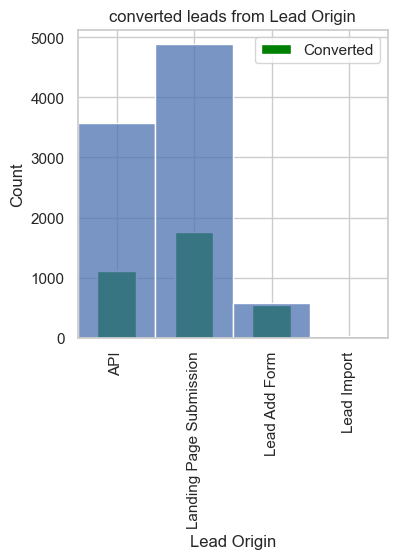

In [51]:
# plot to show columns and they impact on target variables 
plt.figure(figsize=(10,10))
leaddatamod.pivot_table(values='Converted',index='Lead Origin',aggfunc=np.sum).plot.bar(figsize=(4,4),rot=90,color ='green')
idxx = 'Lead Origin'
title= 'converted leads from '+ idxx
plt.title(title)
sns.histplot(data = leaddatamod, x = "Lead Origin")
plt.show()

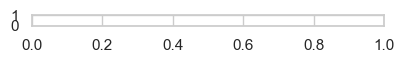

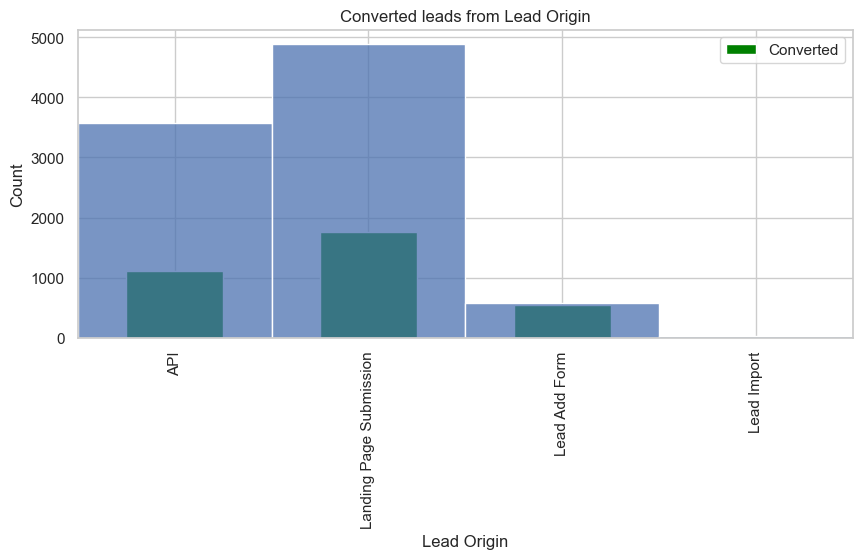

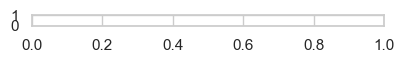

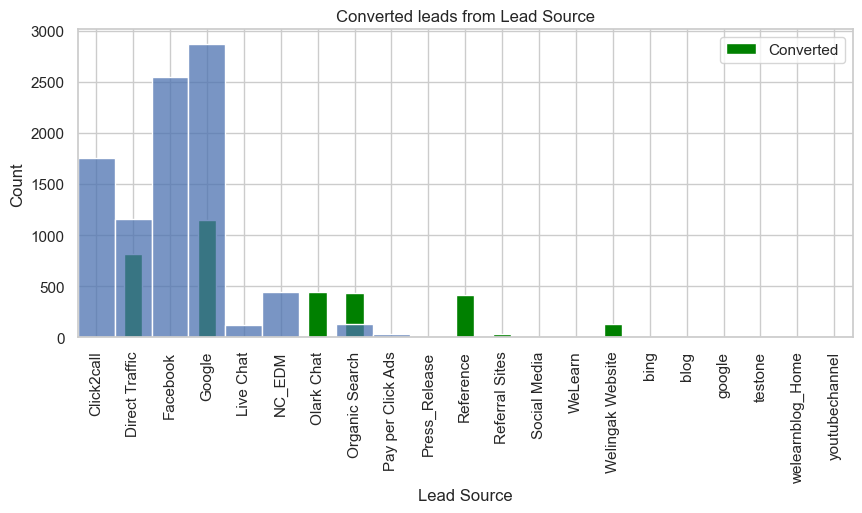

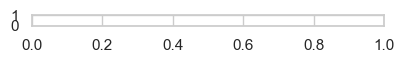

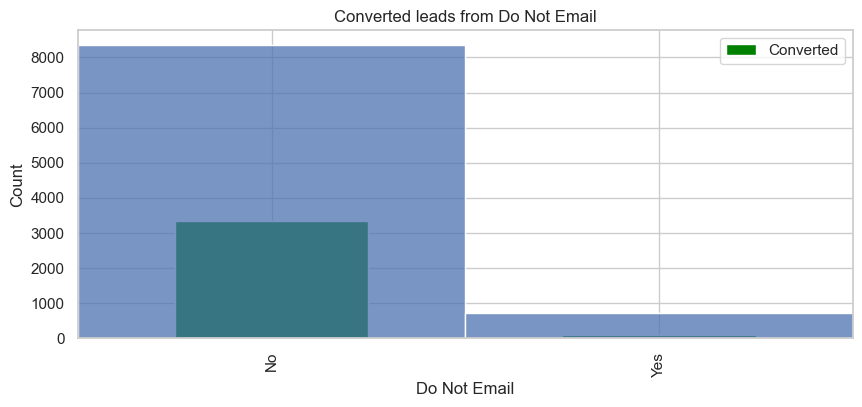

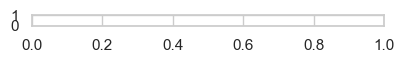

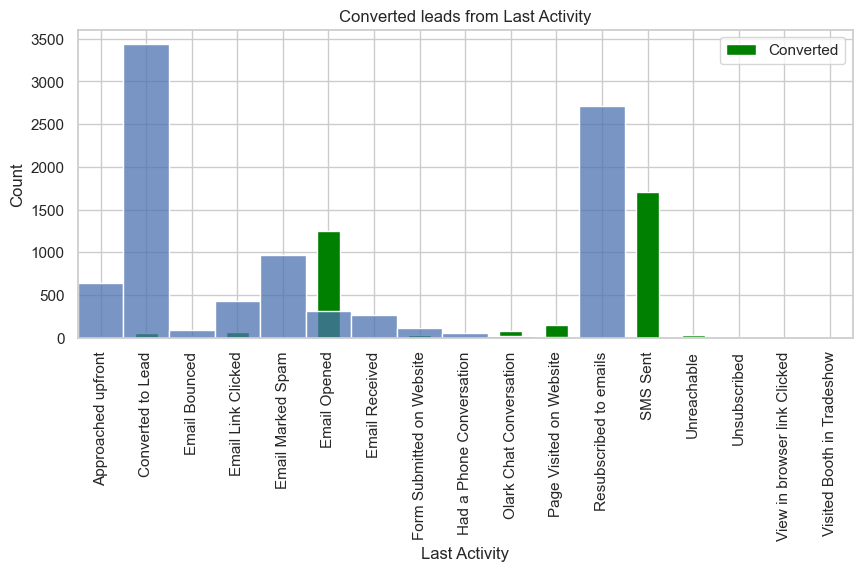

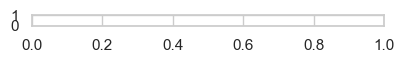

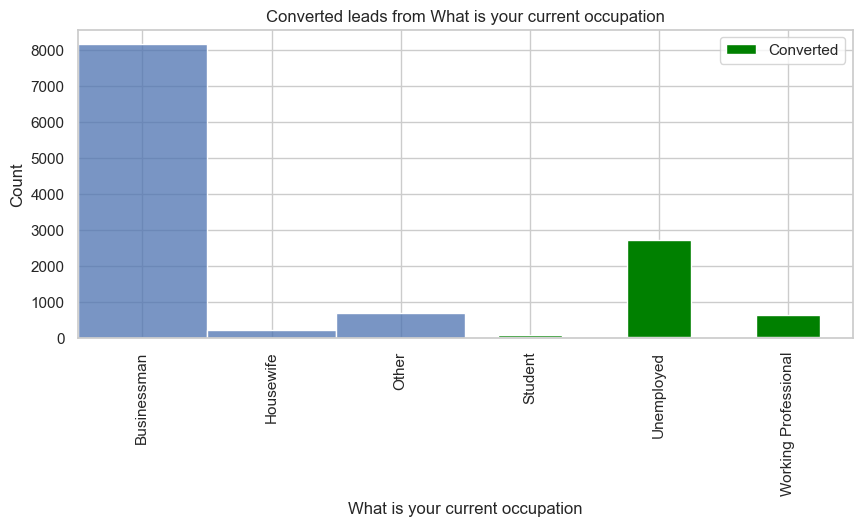

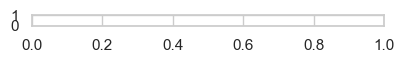

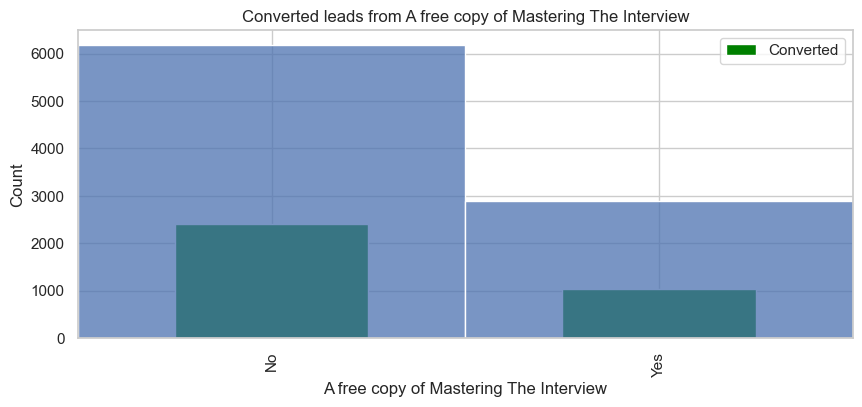

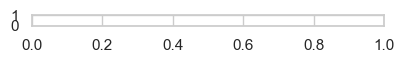

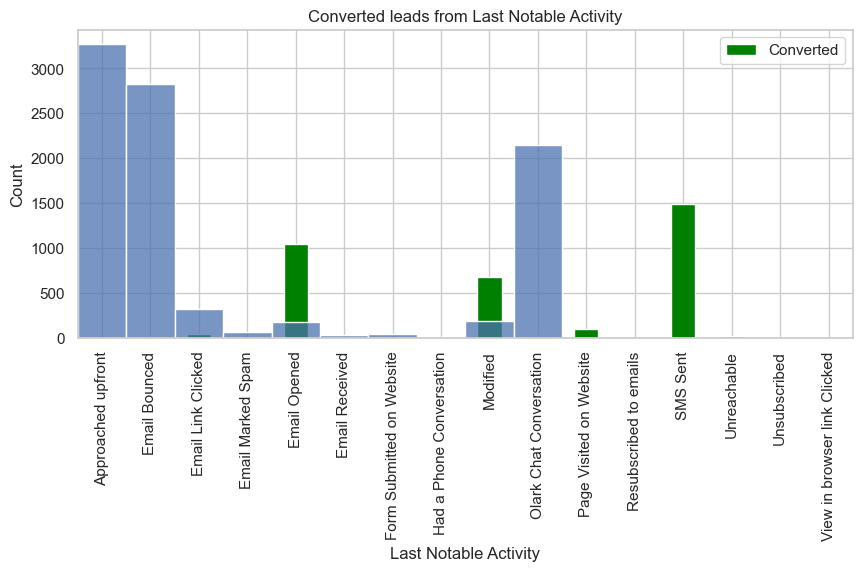

In [52]:
# Analysising the impact of Categorical attributes on target variable Converted
catcols = leaddatamod.select_dtypes(include='object').columns
#plt.figure(figsize=(25, 25))
#sns.set(style='whitegrid')
cnt = 1
for i in catcols:
    plt.figure(figsize=(10,4))
    plt.subplot(25,2,cnt)
    leaddatamod.pivot_table(values='Converted',index=i,aggfunc=np.sum).plot.bar(figsize=(10,4),rot=90,color ='green')
    title= 'Converted leads from '+ i
    plt.title(title)
    sns.histplot(data = leaddatamod, x = i)
    cnt = cnt + 1
plt.show()

## 4 & 5 . Model Building & Evaluation

In [53]:
# Creating dummies 
makedumycols = leaddatamod.select_dtypes(include='object').columns

In [54]:
for i in makedumycols:
    print(i)

Lead Origin
Lead Source
Do Not Email
Last Activity
What is your current occupation
A free copy of Mastering The Interview
Last Notable Activity


In [55]:
leaddatamod['Lead Origin'].value_counts()

Lead Origin
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: count, dtype: int64

In [56]:
#Making Categorical to by dumpfication 
#makedumycols = ['Lead Origin']
# checking if Drop first is reuired or not, with drop firt we are loosing the information 
leaddatamod_logreg = pd.get_dummies(data=leaddatamod,columns=makedumycols)

In [57]:
leaddatamod_logreg.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Click2call',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Do Not Email_No', 'Do Not Email_Yes',
       'Last Activity_Approached upfront', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced'

In [58]:
leaddatamod_logreg.shape

(9074, 72)

#### Train test Split 

In [59]:
# creation of X
X=leaddatamod_logreg

In [60]:
#creation of y 
y=leaddatamod_logreg.pop('Converted')

In [61]:
X.shape , y.shape

((9074, 71), (9074,))

#### Scaling the Numeric / continous Variable 

In [62]:
# scaling of numerical variables for Train data
scale = MinMaxScaler()
numcols1 = ['Total Time Spent on Website', 'TotalVisits', 'Page Views Per Visit']
X[numcols1] = scale.fit_transform(X[numcols1])

In [63]:
## spliting between train and test 
# train abd test split ( 70:30  )
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=41)

In [64]:
# checking on the shapes of the train and test dataset
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6351, 71), (2723, 71), (6351,), (2723,))

## Creating a Base Model for LR using Sklearn ( Model : 1)

In [65]:
#building a model using Sklearn sort of base model
logreg = LogisticRegression(random_state=41)

In [66]:
logreg.fit(X_train, y_train)

LogisticRegression(random_state=41)

In [67]:
y_train_pred = logreg.predict(X_train)

In [68]:
accuracy_score(y_train, y_train_pred)

0.8156195874665407

In [69]:
confusion_matrix(y_train, y_train_pred)

array([[3554,  426],
       [ 745, 1626]], dtype=int64)

In [70]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      3980
           1       0.79      0.69      0.74      2371

    accuracy                           0.82      6351
   macro avg       0.81      0.79      0.80      6351
weighted avg       0.81      0.82      0.81      6351



In [71]:
## testing on test set/ unseen data 
y_test_pred = logreg.predict(X_test)

In [72]:
accuracy_score(y_test, y_test_pred)

0.8123393316195373

######  Model Evaluation using Cross validation

In [73]:
cross_val_score(logreg, X_train, y_train, cv=5, n_jobs=-1)

array([0.83005507, 0.82204724, 0.78740157, 0.81732283, 0.8023622 ])

In [74]:
cross_val_score(logreg, X_train, y_train, cv=5, n_jobs=-1).mean()

0.8118377866024025

In [75]:
cross_val_score(logreg, X_test, y_test, cv=5, n_jobs=-1).mean()

0.8145460064759849

## Feature selection & Creating few more models to compare ( Model : 2)

#### Recursive Feature Elimination - RFE

In [76]:
logreg = LogisticRegression(random_state=41)

In [77]:
rfe = RFE(estimator=logreg, n_features_to_select=11)

In [78]:
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(random_state=41), n_features_to_select=11)

In [79]:
rfe.ranking_

array([10,  1,  1, 13, 12,  1, 43, 23, 29, 34, 32, 46, 59, 14, 33, 44, 41,
        6, 31, 18, 35,  1, 58, 60, 30, 61, 36, 40,  1, 17,  5,  7,  8, 38,
       24, 20, 55, 39,  1,  9, 37, 25, 19, 56, 26, 16, 53, 42, 11, 47,  4,
        3,  1, 57, 50, 51, 52,  1, 28,  2, 54, 45, 15,  1,  1,  1, 22, 27,
       21, 48, 49])

In [80]:
X_train.columns[rfe.support_]

Index(['Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Do Not Email_No', 'Last Activity_Had a Phone Conversation',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

## Model : 2 with 11 Features 

In [81]:
# Model with 11 Features 
X_train2 = X_train.loc[:,rfe.support_]
X_train2.shape

(6351, 11)

In [82]:
cross_val_score(logreg, X_train2, y_train, n_jobs=-1)

array([0.81904013, 0.81811024, 0.77480315, 0.7984252 , 0.79133858])

In [83]:
cross_val_score(logreg, X_train2, y_train, n_jobs=-1).mean()

0.8003434582478922

In [84]:
# Testing in test Data / Unseen data 
X_test2 = X_test.loc[:,rfe.support_]
X_test2.shape

(2723, 11)

In [85]:
cross_val_score(logreg, X_test2, y_test, n_jobs=-1).mean()

0.7983917970858069

## Model : 3 with 15 Features 

In [86]:
# Model with 15 Features 
rfe = RFE(estimator=logreg, n_features_to_select=15)

In [87]:
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(random_state=41), n_features_to_select=15)

In [88]:
rfe.ranking_

array([ 6,  1,  1,  9,  8,  1, 39, 19, 25, 30, 28, 42, 55, 10, 29, 40, 37,
        2, 27, 14, 31,  1, 54, 56, 26, 57, 32, 36,  1, 13,  1,  3,  4, 34,
       20, 16, 51, 35,  1,  5, 33, 21, 15, 52, 22, 12, 49, 38,  7, 43,  1,
        1,  1, 53, 46, 47, 48,  1, 24,  1, 50, 41, 11,  1,  1,  1, 18, 23,
       17, 44, 45])

In [89]:
X_train.columns[rfe.support_]

Index(['Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Do Not Email_No', 'Last Activity_Approached upfront',
       'Last Activity_Had a Phone Conversation',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [90]:
X_train3 = X_train.loc[:,rfe.support_]
X_train3.shape

(6351, 15)

In [91]:
cross_val_score(logreg, X_train3, y_train, n_jobs=-1).mean()

0.7951482185891201

In [92]:
# Testing in test Data / Unseen data 
X_test3 = X_test.loc[:,rfe.support_]
X_test3.shape

(2723, 15)

In [93]:
cross_val_score(logreg, X_test3, y_test, n_jobs=-1).mean()

0.7914145979492714

## Model : 4 with 20 Features 

In [94]:
# Model with 20 Features 
rfe = RFE(estimator=logreg, n_features_to_select=20)

In [95]:
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(random_state=41), n_features_to_select=20)

In [96]:
rfe.ranking_

array([ 1,  1,  1,  4,  3,  1, 34, 14, 20, 25, 23, 37, 50,  5, 24, 35, 32,
        1, 22,  9, 26,  1, 49, 51, 21, 52, 27, 31,  1,  8,  1,  1,  1, 29,
       15, 11, 46, 30,  1,  1, 28, 16, 10, 47, 17,  7, 44, 33,  2, 38,  1,
        1,  1, 48, 41, 42, 43,  1, 19,  1, 45, 36,  6,  1,  1,  1, 13, 18,
       12, 39, 40])

In [97]:
X_train.columns[rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Do Not Email_No',
       'Last Activity_Approached upfront', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [98]:
X_train4 = X_train.loc[:,rfe.support_]
X_train4.shape

(6351, 20)

In [99]:
cross_val_score(logreg, X_train4, y_train, n_jobs=-1).mean()

0.7975099277027822

In [100]:
# Testing in test Data / Unseen data 
X_test4 = X_test.loc[:,rfe.support_]
X_test4.shape

(2723, 20)

In [101]:
cross_val_score(logreg, X_test4, y_test, n_jobs=-1).mean()

0.7950876956287102

## Model : 5 with 25 Features 

In [102]:
rfe = RFE(estimator=logreg, n_features_to_select=25)

In [103]:
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(random_state=41), n_features_to_select=25)

In [104]:
rfe.ranking_

array([ 1,  1,  1,  1,  1,  1, 29,  9, 15, 20, 18, 32, 45,  1, 19, 30, 27,
        1, 17,  4, 21,  1, 44, 46, 16, 47, 22, 26,  1,  3,  1,  1,  1, 24,
       10,  6, 41, 25,  1,  1, 23, 11,  5, 42, 12,  2, 39, 28,  1, 33,  1,
        1,  1, 43, 36, 37, 38,  1, 14,  1, 40, 31,  1,  1,  1,  1,  8, 13,
        7, 34, 35])

In [105]:
X_train.columns[rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_API', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_No', 'Last Activity_Approached upfront',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Pa

In [106]:
X_train5 = X_train.loc[:,rfe.support_]
X_train5.shape

(6351, 25)

In [107]:
cross_val_score(logreg, X_train5, y_train, n_jobs=-1).mean()

0.8126255598852661

In [108]:
# Testing in test Data / Unseen data 
X_test5 = X_test.loc[:,rfe.support_]
X_test5.shape

(2723, 25)

In [109]:
cross_val_score(logreg, X_test5, y_test, n_jobs=-1).mean()

0.8134504856988667

## Model : 6 with 35 Features 

In [110]:
rfe = RFE(estimator=logreg, n_features_to_select=35)

In [111]:
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(random_state=41), n_features_to_select=35)

In [112]:
rfe.ranking_

array([ 1,  1,  1,  1,  1,  1, 19,  1,  5, 10,  8, 22, 35,  1,  9, 20, 17,
        1,  7,  1, 11,  1, 34, 36,  6, 37, 12, 16,  1,  1,  1,  1,  1, 14,
        1,  1, 31, 15,  1,  1, 13,  1,  1, 32,  2,  1, 29, 18,  1, 23,  1,
        1,  1, 33, 26, 27, 28,  1,  4,  1, 30, 21,  1,  1,  1,  1,  1,  3,
        1, 24, 25])

In [113]:
X_train.columns[rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_API', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Click2call',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Lead Source_Welingak Website',
       'Do Not Email_No', 'Do Not Email_Yes',
       'Last Activity_Approached upfront', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_View in browser link Clicked',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
   

In [114]:
X_train6 = X_train.loc[:,rfe.support_]
X_train6.shape

(6351, 35)

In [115]:
cross_val_score(logreg, X_train6, y_train, n_jobs=-1).mean()

0.8121531189403843

In [116]:
# Testing in test Data / Unseen data 
X_test6 = X_test.loc[:,rfe.support_]
X_test6.shape

(2723, 35)

In [117]:
cross_val_score(logreg, X_test6, y_test, n_jobs=-1).mean()

0.813815434430653

## Model : 7 with 10 Features

In [118]:
rfe = RFE(estimator=logreg, n_features_to_select=10)

In [119]:
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(random_state=41), n_features_to_select=10)

In [120]:
rfe.ranking_

array([11,  1,  1, 14, 13,  1, 44, 24, 30, 35, 33, 47, 60, 15, 34, 45, 42,
        7, 32, 19, 36,  1, 59, 61, 31, 62, 37, 41,  1, 18,  6,  8,  9, 39,
       25, 21, 56, 40,  1, 10, 38, 26, 20, 57, 27, 17, 54, 43, 12, 48,  5,
        4,  1, 58, 51, 52, 53,  2, 29,  3, 55, 46, 16,  1,  1,  1, 23, 28,
       22, 49, 50])

In [121]:
X_train.columns[rfe.support_]

Index(['Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Do Not Email_No', 'Last Activity_Had a Phone Conversation',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [122]:
X_train7 = X_train.loc[:,rfe.support_]
X_train7.shape

(6351, 10)

In [123]:
cross_val_score(logreg, X_train7, y_train, n_jobs=-1).mean()

0.8009733795077347

In [124]:
# Testing in test Data / Unseen data 
X_test7 = X_test.loc[:,rfe.support_]
X_test7.shape

(2723, 10)

In [125]:
cross_val_score(logreg, X_test7, y_test, n_jobs=-1).mean()

0.7987580949811118

## Summary of the Model buding excercise
## Conclusion
below are he cross val score for the few model we had build and analysed 
Model(s)     Cross Val Score(Train)       cross Val score (Test)
Base Model   0.8118377866024025           0.8145460064759849
Model 2      0.8003434582478922           0.7983917970858069
Model 3      0.7951482185891201           0.7914145979492714
Model 4      0.7975099277027822           0.7950876956287102        
Model 5      0.8126255598852661           0.8134504856988667
Model 6      0.8121531189403843           0.813815434430653
Model 7      0.8009733795077347           0.7987580949811118

##Model 5 looks to be best model 
below are the features of the model 5 , 25 features considered below seems to be optimal 
['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_API', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_No', 'Last Activity_Approached upfront',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website']

### Summary 
1. Lead Origin and Lead source are key for getting the lead coonverted 
2. Leads Originating from the below source 
   2.1 API
    2.2 Landing Page Submisison 
    2.3 Add form 
3. Lead Sources coming from below 
    3.1 Olark chat 
    3.2 Reference 
    3.3 website 
4. Company should consider to reach out leads from point 2 and 3 as they are potential leads to be converted 
5. Below leads whose occupation are considered to be potential leads to be converted 
    5.1 unemployed 
    5.2 Student 
    5.3 house wife 
    5.4 working professional 


##### ************************* End *************************